In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from keras.optimizers import Adam, RMSprop,SGD, Adagrad
from keras.layers import BatchNormalization
import numpy as np
import matplotlib as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import glob
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.layers import Dropout
import math
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [23]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=f07afdef00838c4610d261c8260576d9ed49346a20e6c2a3f9203020a3cd3db2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [4]:
import pickle

X = pickle.load(open('C:/Users/HP/X_train.pickle','rb'))
y = pickle.load(open('C:/Users/HP/y_train.pickle','rb'))

X=np.array(X)
y=np.array(y)
/
X = X /255

# 1

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(6,6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(6,6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (4,4)))

model.add(Flatten())
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(4, activation="softmax"))
opt = Adam(lr=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
activation_10 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 18, 128)      

In [14]:
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 988s 473ms/step - loss: 1.1178 - accuracy: 0.5588 - val_loss: 0.9579 - val_accuracy: 0.6557
Epoch 2/15
2088/2088 [==============================] - 1009s 483ms/step - loss: 0.8873 - accuracy: 0.6708 - val_loss: 0.8639 - val_accuracy: 0.6693
Epoch 3/15
2088/2088 [==============================] - 1032s 494ms/step - loss: 0.8235 - accuracy: 0.6851 - val_loss: 0.8362 - val_accuracy: 0.6755
Epoch 4/15
2088/2088 [==============================] - 1040s 498ms/step - loss: 0.7830 - accuracy: 0.6957 - val_loss: 0.7745 - val_accuracy: 0.6924
Epoch 5/15
2088/2088 [==============================] - 980s 469ms/step - loss: 0.7515 - accuracy: 0.7045 - val_loss: 0.7439 - val_accuracy: 0.7035
Epoch 6/15
2088/2088 [==============================] - 833s 399ms/step - loss: 0.7203 - accuracy: 0.7201 - val_loss: 0.7235 - val_accuracy: 0.7214
Epoch 7/15
2088/2088 [==============================] - 830s 397ms/step - loss: 0.6873 - accuracy: 0.7372 - v

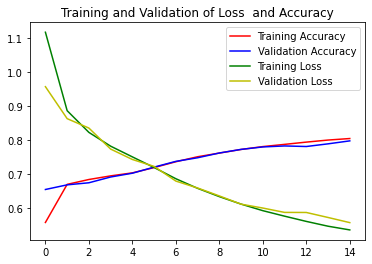

In [15]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val                                                                  _loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [6]:
import pickle

X_test = pickle.load(open('C:/Users/HP/X_test.pickle','rb'))
y_test = pickle.load(open('C:/Users/HP/y_test.pickle','rb'))

X_test=np.array(X_test)
y_test=np.array(y_test)

X_test = X_test /255

In [7]:
y_test.shape

(968,)

In [24]:
import sklearn
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[236,   6,   0,   0],
       [ 24, 175,   3,  40],
       [ 87,  22,  48,  85],
       [  0,   1,   0, 241]], dtype=int64)

# 2

In [26]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D())
model.add(Conv2D(32,3,padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64, 6, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, 9, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, 9, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation="softmax"))
opt = Adam(lr=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 762s 365ms/step - loss: 1.0046 - accuracy: 0.6312 - val_loss: 1.0981 - val_accuracy: 0.5929
Epoch 2/15
2088/2088 [==============================] - 987s 472ms/step - loss: 0.7385 - accuracy: 0.7443 - val_loss: 0.7402 - val_accuracy: 0.7232
Epoch 3/15
2088/2088 [==============================] - 966s 463ms/step - loss: 0.6608 - accuracy: 0.7741 - val_loss: 0.6586 - val_accuracy: 0.7653
Epoch 4/15
2088/2088 [==============================] - 908s 435ms/step - loss: 0.6053 - accuracy: 0.7919 - val_loss: 0.5851 - val_accuracy: 0.7889
Epoch 5/15
2088/2088 [==============================] - 843s 404ms/step - loss: 0.5583 - accuracy: 0.8060 - val_loss: 0.5697 - val_accuracy: 0.7940
Epoch 6/15
2088/2088 [==============================] - 790s 379ms/step - loss: 0.5280 - accuracy: 0.8152 - val_loss: 0.5107 - val_accuracy: 0.8210
Epoch 7/15
2088/2088 [==============================] - 791s 379ms/step - loss: 0.5028 - accuracy: 0.8240 - val_

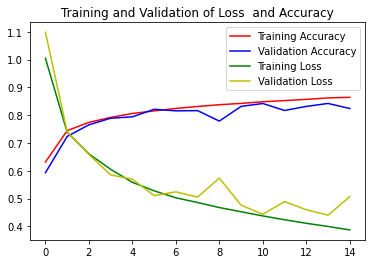

In [27]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[236,   5,   1,   0],
       [  3, 221,   1,  17],
       [ 33,  27, 135,  47],
       [  0,   1,   0, 241]], dtype=int64)

# 3

In [6]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 495s 237ms/step - loss: 0.5046 - accuracy: 0.8144 - val_loss: 0.6231 - val_accuracy: 0.7582
Epoch 2/15
2088/2088 [==============================] - 521s 249ms/step - loss: 0.2942 - accuracy: 0.8985 - val_loss: 0.3685 - val_accuracy: 0.8667
Epoch 3/15
2088/2088 [==============================] - 477s 228ms/step - loss: 0.2426 - accuracy: 0.9158 - val_loss: 0.3134 - val_accuracy: 0.8977
Epoch 4/15
2088/2088 [==============================] - 458s 219ms/step - loss: 0.2184 - accuracy: 0.9241 - val_loss: 0.2320 - val_accuracy: 0.9182
Epoch 5/15
2088/2088 [==============================] - 457s 219ms/step - loss: 0.1971 - accuracy: 0.9319 - val_loss: 0.2312 - val_accuracy: 0.9212
Epoch 6/15
2088/2088 [==============================] - 469s 225ms/step - loss: 0.1788 - accuracy: 0.9373 - val_loss: 0.2226 - val_accuracy: 0.9241
Epoch 7/15
2088/2088 [==============================] - 529s 253ms/step - loss: 0.1658 - accuracy: 0.9431 - val_

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[240,   2,   0,   0],
       [  6, 235,   1,   0],
       [  4,   0, 238,   0],
       [  0,   0,  10, 232]], dtype=int64)

# cnn testing


In [6]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="RMSProp", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [8]:
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 621s 297ms/step - loss: 0.1628 - accuracy: 0.9434 - val_loss: 0.2248 - val_accuracy: 0.9248
Epoch 2/15
2088/2088 [==============================] - 597s 286ms/step - loss: 0.1542 - accuracy: 0.9458 - val_loss: 0.7934 - val_accuracy: 0.8085
Epoch 3/15
2088/2088 [==============================] - 588s 282ms/step - loss: 0.1421 - accuracy: 0.9497 - val_loss: 1.8153 - val_accuracy: 0.6251
Epoch 4/15
2088/2088 [==============================] - 598s 286ms/step - loss: 0.1345 - accuracy: 0.9527 - val_loss: 0.4297 - val_accuracy: 0.8848
Epoch 5/15
2088/2088 [==============================] - 664s 318ms/step - loss: 0.1299 - accuracy: 0.9548 - val_loss: 0.2350 - val_accuracy: 0.9276
Epoch 6/15
2088/2088 [==============================] - 663s 318ms/step - loss: 0.1226 - accuracy: 0.9570 - val_loss: 0.4623 - val_accuracy: 0.8269
Epoch 7/15
2088/2088 [==============================] - 665s 318ms/step - loss: 0.1153 - accuracy: 0.9600 - val_

In [9]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[238,   0,   0,   4],
       [ 29,  81,   1, 131],
       [ 23,   0, 203,  16],
       [  0,   0,   0, 242]], dtype=int64)

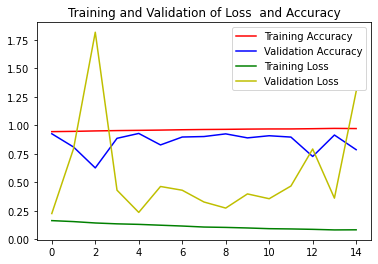

In [10]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [11]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [12]:
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 538s 258ms/step - loss: 0.7345 - accuracy: 0.7224 - val_loss: 2.2917 - val_accuracy: 0.6594
Epoch 2/15
2088/2088 [==============================] - 658s 315ms/step - loss: 0.5121 - accuracy: 0.8151 - val_loss: 0.5622 - val_accuracy: 0.7952
Epoch 3/15
2088/2088 [==============================] - 668s 320ms/step - loss: 0.3958 - accuracy: 0.8579 - val_loss: 0.4322 - val_accuracy: 0.8485
Epoch 4/15
2088/2088 [==============================] - 669s 320ms/step - loss: 0.3282 - accuracy: 0.8829 - val_loss: 0.5904 - val_accuracy: 0.7715
Epoch 5/15
2088/2088 [==============================] - 669s 320ms/step - loss: 0.2868 - accuracy: 0.8995 - val_loss: 4.4359 - val_accuracy: 0.2197
Epoch 6/15
2088/2088 [==============================] - 671s 321ms/step - loss: 0.2587 - accuracy: 0.9089 - val_loss: 0.6640 - val_accuracy: 0.7695
Epoch 7/15
2088/2088 [==============================] - 679s 325ms/step - loss: 0.2378 - accuracy: 0.9170 - val_

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[167,  75,   0,   0],
       [  0, 242,   0,   0],
       [107, 110,  25,   0],
       [  0, 220,   0,  22]], dtype=int64)

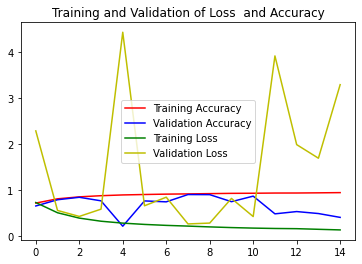

In [14]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [15]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adadelta", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [16]:
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 818s 392ms/step - loss: 1.3713 - accuracy: 0.3239 - val_loss: 1.3363 - val_accuracy: 0.3871
Epoch 2/15
2088/2088 [==============================] - 662s 317ms/step - loss: 1.3141 - accuracy: 0.4198 - val_loss: 1.2741 - val_accuracy: 0.4679
Epoch 3/15
2088/2088 [==============================] - 676s 324ms/step - loss: 1.2546 - accuracy: 0.4833 - val_loss: 1.2139 - val_accuracy: 0.5178
Epoch 4/15
2088/2088 [==============================] - 666s 319ms/step - loss: 1.1933 - accuracy: 0.5369 - val_loss: 1.1524 - val_accuracy: 0.5603
Epoch 5/15
2088/2088 [==============================] - 758s 363ms/step - loss: 1.1318 - accuracy: 0.5794 - val_loss: 1.1010 - val_accuracy: 0.5895
Epoch 6/15
2088/2088 [==============================] - 667s 320ms/step - loss: 1.0769 - accuracy: 0.6125 - val_loss: 1.0426 - val_accuracy: 0.6236
Epoch 7/15
2088/2088 [==============================] - 638s 305ms/step - loss: 1.0242 - accuracy: 0.6347 - val_

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[233,   4,   0,   5],
       [ 62,  76,   4, 100],
       [ 88,  17,  19, 118],
       [  1,   0,   0, 241]], dtype=int64)

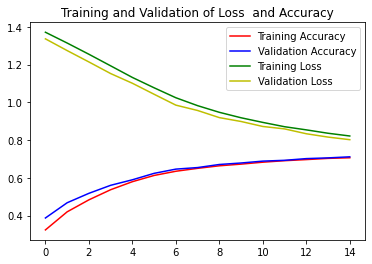

In [18]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adagrad", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [9]:
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 531s 254ms/step - loss: 0.8633 - accuracy: 0.6803 - val_loss: 0.8552 - val_accuracy: 0.6789
Epoch 2/15
2088/2088 [==============================] - 630s 302ms/step - loss: 0.6816 - accuracy: 0.7523 - val_loss: 1.0566 - val_accuracy: 0.6094
Epoch 3/15
2088/2088 [==============================] - 641s 307ms/step - loss: 0.6168 - accuracy: 0.7796 - val_loss: 0.7108 - val_accuracy: 0.7328
Epoch 4/15
2088/2088 [==============================] - 627s 301ms/step - loss: 0.5756 - accuracy: 0.7954 - val_loss: 0.9021 - val_accuracy: 0.6481
Epoch 5/15
2088/2088 [==============================] - 657s 315ms/step - loss: 0.5455 - accuracy: 0.8069 - val_loss: 0.5517 - val_accuracy: 0.8000
Epoch 6/15
2088/2088 [==============================] - 690s 330ms/step - loss: 0.5249 - accuracy: 0.8160 - val_loss: 0.6117 - val_accuracy: 0.7701
Epoch 7/15
2088/2088 [==============================] - 691s 331ms/step - loss: 0.5073 - accuracy: 0.8222 - val_

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[236,   5,   1,   0],
       [ 10, 212,   0,  20],
       [ 68,  13, 117,  44],
       [  0,   1,   1, 240]], dtype=int64)

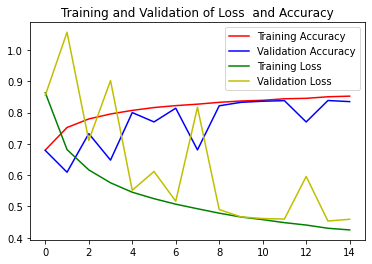

In [11]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [16]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape = X.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
model.compile(optimizer = 'Adam', loss = 'squared_hinge', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [17]:
history = model.fit(X, y, epochs = 15, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/15
2088/2088 [==============================] - 690s 330ms/step - loss: 0.5730 - accuracy: 0.2467 - val_loss: 0.5679 - val_accuracy: 0.4431
Epoch 2/15
2088/2088 [==============================] - 688s 329ms/step - loss: 0.5675 - accuracy: 0.4460 - val_loss: 0.5679 - val_accuracy: 0.4431
Epoch 3/15
2088/2088 [==============================] - 718s 344ms/step - loss: 0.5675 - accuracy: 0.4463 - val_loss: 0.5679 - val_accuracy: 0.4431
Epoch 4/15
2088/2088 [==============================] - 711s 341ms/step - loss: 0.5675 - accuracy: 0.4463 - val_loss: 0.5679 - val_accuracy: 0.4431
Epoch 5/15
2088/2088 [==============================] - 728s 349ms/step - loss: 0.5675 - accuracy: 0.4463 - val_loss: 0.5679 - val_accuracy: 0.4431
Epoch 6/15
2088/2088 [==============================] - 730s 349ms/step - loss: 0.5675 - accuracy: 0.4463 - val_loss: 0.5679 - val_accuracy: 0.4431
Epoch 7/15
2088/2088 [==============================] - 749s 359ms/step - loss: 0.5675 - accuracy: 0.4463 - val_

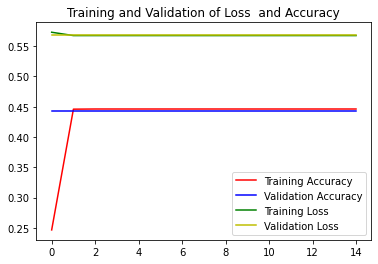

In [18]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test,y_pred)
cm

array([[242,   0,   0,   0],
       [242,   0,   0,   0],
       [242,   0,   0,   0],
       [242,   0,   0,   0]], dtype=int64)